In [1]:
import numpy as np
from keras.datasets import imdb
from  keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
world_index = imdb.get_word_index()
world_index = dict([(value, key) for (key, value) in imdb.get_word_index().items()])

In [7]:
world_index.get(16 - 3) # las primeras 3 palabras son reservadas

'was'

In [8]:
for _ in train_data[0]:
    print(world_index.get(_ - 3), end=' ')

None this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert None is an amazing actor and now the same being director None father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for None and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also None to the two little boy's that played the None of norman and paul they were just brilliant children are often left out of the None list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they ha

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 12s 211ms/step - loss: 0.5476 - accuracy: 0.7669 - val_loss: 0.4307 - val_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 4s 122ms/step - loss: 0.3470 - accuracy: 0.8910 - val_loss: 0.3306 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2590 - accuracy: 0.9168 - val_loss: 0.2934 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2097 - accuracy: 0.9290 - val_loss: 0.2958 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1722 - accuracy: 0.9450 - val_loss: 0.2754 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1467 - accuracy: 0.9527 - val_loss: 0.2852 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1211 - accuracy: 0.9630 - val_loss: 0.2890 - val_accuracy: 0.8853
Epoch 8/20

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

In [20]:
history_dict

{'loss': [0.5475785732269287,
  0.3470027446746826,
  0.2590160369873047,
  0.20965921878814697,
  0.1721811592578888,
  0.14672766625881195,
  0.12110748887062073,
  0.10578927397727966,
  0.08906279504299164,
  0.07785090804100037,
  0.06078597903251648,
  0.053574610501527786,
  0.042148277163505554,
  0.03569377213716507,
  0.028152471408247948,
  0.024987511336803436,
  0.019753005355596542,
  0.017780033871531487,
  0.011305836029350758,
  0.0122135691344738],
 'accuracy': [0.7669333219528198,
  0.890999972820282,
  0.9168000221252441,
  0.9290000200271606,
  0.9449999928474426,
  0.9526666402816772,
  0.9629999995231628,
  0.9674000144004822,
  0.9747999906539917,
  0.9766666889190674,
  0.9850666522979736,
  0.9869999885559082,
  0.9917333126068115,
  0.9937333464622498,
  0.996066689491272,
  0.9965333342552185,
  0.9974666833877563,
  0.9976666569709778,
  0.9995333552360535,
  0.9983333349227905],
 'val_loss': [0.4307282567024231,
  0.3306388258934021,
  0.2934020757675171,


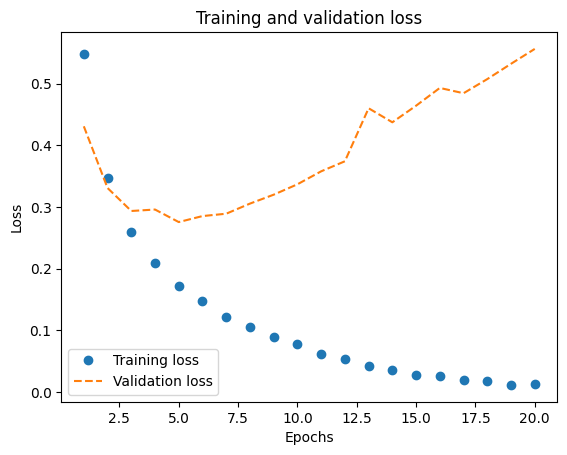

In [21]:
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

El modelo esta haciendo un overfitting

In [22]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6012 - accuracy: 0.8608


[0.6011950373649597, 0.8608400225639343]

# Reduciendo el overfitting

## Small model

In [23]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 165ms/step - loss: 0.6233 - accuracy: 0.6957 - val_loss: 0.5676 - val_accuracy: 0.8237
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5290 - accuracy: 0.8141 - val_loss: 0.5173 - val_accuracy: 0.8224
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4791 - accuracy: 0.8576 - val_loss: 0.5026 - val_accuracy: 0.7850
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4378 - accuracy: 0.8876 - val_loss: 0.4641 - val_accuracy: 0.8346
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3922 - accuracy: 0.9141 - val_loss: 0.4267 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3421 - accuracy: 0.9319 - val_loss: 0.3950 - val_accuracy: 0.8593
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2886 - accuracy: 0.9451 - val_loss: 0.3555 - val_accuracy: 0.8730
Epoch 8/20
3

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 40004     
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


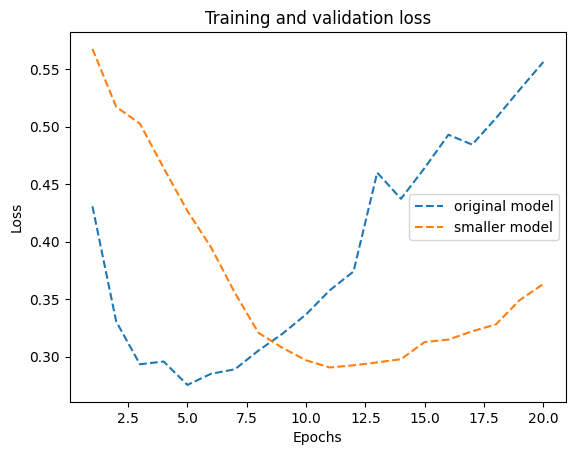

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']

epochs = range(1, len(loss_values) + 1)

# plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='original model')
plt.plot(epochs, val_loss_values2, '--', label='smaller model')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Regularizacion

In [26]:
from keras import regularizers

In [29]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), 
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 14s 98ms/step - loss: 0.5890 - accuracy: 0.7605 - val_loss: 0.4718 - val_accuracy: 0.8545
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3946 - accuracy: 0.8895 - val_loss: 0.3862 - val_accuracy: 0.8748
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3107 - accuracy: 0.9177 - val_loss: 0.3621 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2694 - accuracy: 0.9273 - val_loss: 0.3329 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2431 - accuracy: 0.9382 - val_loss: 0.3294 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2265 - accuracy: 0.9433 - val_loss: 0.3409 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2120 - accuracy: 0.9504 - val_loss: 0.3453 - val_accuracy: 0.8835
Epoch 8/20
3

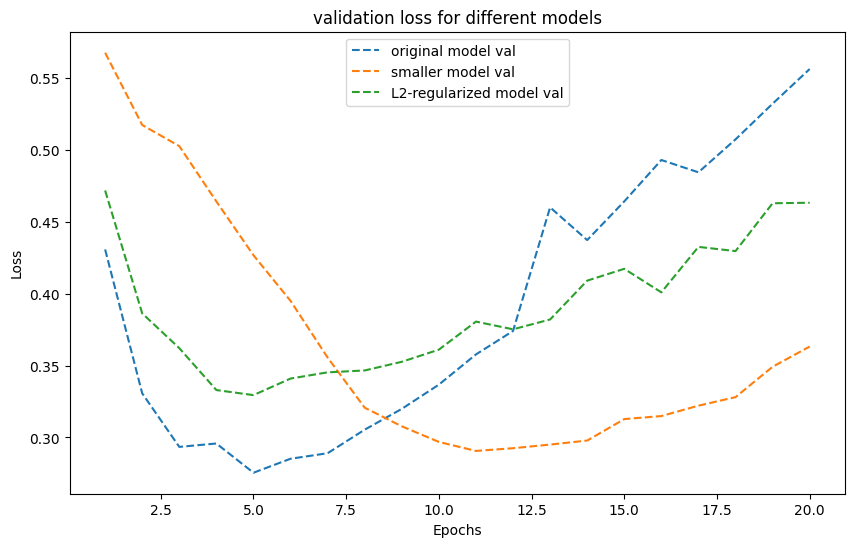

In [33]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']
val_loss_values3 = history3.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))

# plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='original model val')
plt.plot(epochs, val_loss_values2, '--', label='smaller model val')
plt.plot(epochs, val_loss_values3, '--', label='L2-regularized model val')
plt.title('validation loss for different models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Dropout

In [34]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 13s 128ms/step - loss: 0.6656 - accuracy: 0.5876 - val_loss: 0.6059 - val_accuracy: 0.8136
Epoch 2/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6196 - accuracy: 0.6544 - val_loss: 0.5578 - val_accuracy: 0.8553
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.5891 - accuracy: 0.6805 - val_loss: 0.5044 - val_accuracy: 0.8630
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.5660 - accuracy: 0.6964 - val_loss: 0.4825 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.5401 - accuracy: 0.7103 - val_loss: 0.4454 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5250 - accuracy: 0.7162 - val_loss: 0.4306 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.5132 - accuracy: 0.7187 - val_loss: 0.4116 - val_accuracy: 0.8889
Epoch 8/20


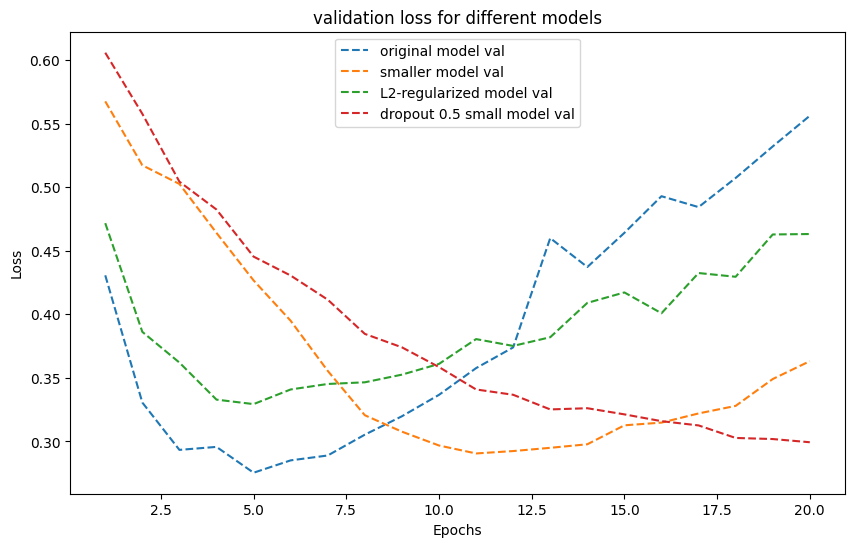

In [37]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values2 = history2.history['val_loss']
val_loss_values3 = history3.history['val_loss']
val_loss_values4 = history4.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))

# plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='original model val')
plt.plot(epochs, val_loss_values2, '--', label='smaller model val')
plt.plot(epochs, val_loss_values3, '--', label='L2-regularized model val')
plt.plot(epochs, val_loss_values4, '--', label='dropout 0.5 small model val')
plt.title('validation loss for different models')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()